In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
pizza = { 'diameter' : [6 ,8, 10, 14, 18],
         'Harga' : [7, 9, 13, 17, 18]}

pizza_df= pd.DataFrame(pizza)
pizza_df

,diameter,Harga
0,6,7
1,8,9
2,10,13
3,14,17
4,18,18


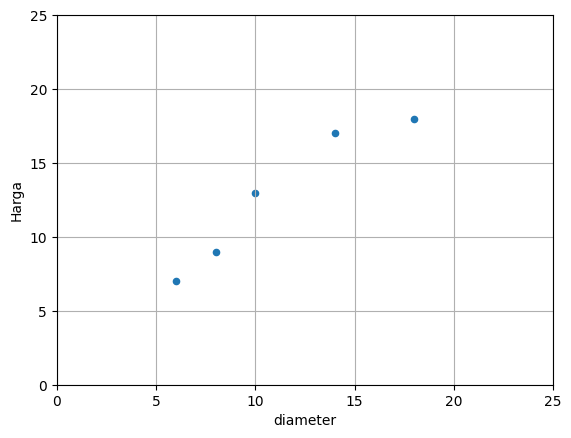

In [3]:
#visualisasi data

pizza_df.plot(kind= 'scatter', x = 'diameter', y = 'Harga')
plt.title= ('perbandingan harga diameter beserta harganya')
plt.xlabel= ('diameter')
plt.ylabel= ('Harga')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [4]:

#penyesuaian Dataset
#konfersi struktur data dari pandas df ke array

X = np.array(pizza_df['diameter'])  #features # array harus 2 dimensi
y = np.array(pizza_df['Harga'])   #Target

print("x :", X)
print("y :", y)

x : [ 6  8 10 14 18]
y : [ 7  9 13 17 18]


In [5]:
# merubah dimensi
x = X.reshape(-1,1) #untuk mengubah kemabali ke dimensi awal bisa gunakan method flatten
x.shape

print(x)

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]


In [6]:
#Training Model dengan simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)  #proses training memerlukan parameter  features dan target


LinearRegression()

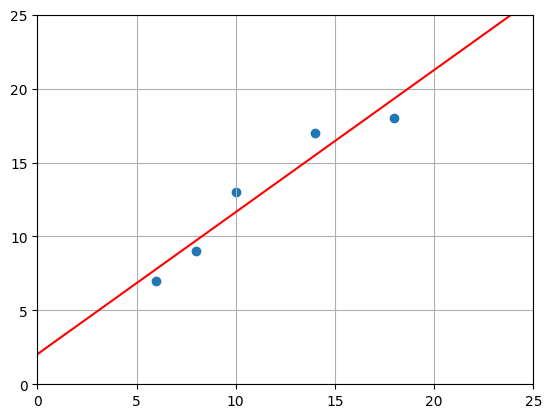

In [7]:
#visualisasi simple linear regression model
x_vis = np.array([0, 25]).reshape(-1,1) # reshape karena np array sebagai feature maka perlu di ubah menajdi 2 dimensi
y_vis = model.predict(x_vis)

plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')
plt.title= ('perbandingan harga diameter beserta harganya')
plt.xlabel= ('diameter')
plt.ylabel= ('Harga')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [9]:
# Menncari intercept and slope
""" Formula Linear Regression  y = lambda + beta.x
y = response variable
x  = explnatory variable
lamda = intercept = titik pada sumbu y diatas 0
beta = slope = tingkat kemiringan garis linier"""

print('intercept :', model.intercept_)
print('slope :', model.coef_)


intercept : 2.034482758620692
slope : [0.9612069]


In [14]:
#Prediksi Harga Pizza

diameter_pizza = np.array([12, 20, 25]).reshape(-1,1)
diameter_pizza

predik_harga = model.predict(diameter_pizza)
predik_harga


array([13.56896552, 21.25862069, 26.06465517])

In [15]:
for diameter, hrg in zip(diameter_pizza, predik_harga):
    print(f'diameter pizza {diameter} memiliki harga {hrg}')

diameter pizza [12] memiliki harga 13.56896551724138
diameter pizza [20] memiliki harga 21.258620689655174
diameter pizza [25] memiliki harga 26.064655172413794


In [16]:
#Evaluasi performance Simple Linear Regression

#Training dan testing Set
x_train = np.array([6, 8, 10, 14, 18]).reshape(-1,1)
y_train = np.array([7, 9, 13, 17, 18])

x_test = np.array([8, 9, 11, 16, 12]).reshape(-1,1)
y_test = np.array([11, 8.5, 15, 18, 11])

In [20]:
#Training Model simple

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
# Evaluasi linear regression model dengan coefficient of determination atau R-squared (R2)

from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r_squared= r2_score(y_test, y_pred) #proses pengukuran degan 2 variable
print('coefficient of determination :', r_squared)

coefficient of determination : 0.6642676548290933
